# Song Popularity Predictor

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [43]:
df = pd.read_csv('./song_data.csv')
df.info()
df.shapedf = pd.read_csv('./song_data.csv')
df.drop('song_name', axis=1, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


/home/mutabazi/miniconda3/envs/songpop/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


Data separation

In [44]:
X = df.iloc[:,1:]
Y = df.iloc[:,0]

Select feature

In [45]:
# compare Variance 
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Select 
selected_features = ['energy', 'danceability', 'loudness', 'tempo', 'key']
X = X[selected_features]


Scale the data

In [46]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [47]:
#Split data
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.20, random_state=42)

Models

In [48]:
linear_reg = LinearRegression()
decision_tree = DecisionTreeRegressor(random_state=42)
random_forest = RandomForestRegressor(random_state=42)

In [49]:
X_train, X_test, Y_train,Y_test = train_test_split(X_scaled,Y,test_size=0.20)

In [50]:
# Let's TRaiin!
models = {
    'Linear Regression': linear_reg,
    'Decision Tree': decision_tree,
    'Random Forest': random_forest
}
model_metrics = {}
for name, model in models.items():
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    
    mse = mean_squared_error(Y_test, Y_pred)
    r2 = r2_score(Y_test, Y_pred)
    
    model_metrics[name] = {'MSE': mse, 'R2': r2}
    print(f"{name} - MSE: {mse:.4f}, R2: {r2:.4f}")

Linear Regression - MSE: 465.6273, R2: 0.0272
Decision Tree - MSE: 590.9994, R2: -0.2348
Random Forest - MSE: 299.6640, R2: 0.3739


Which is the best model?

In [51]:
best_model_name = min(model_metrics, key=lambda k: model_metrics[k]['MSE'])
best_model = models[best_model_name]


In [52]:
#Save the model
joblib.dump(best_model, f'{best_model_name.replace(" ", "_")}_model.pkl')
joblib.dump(scaler, 'song_popularity_scaler.pkl')


['song_popularity_scaler.pkl']

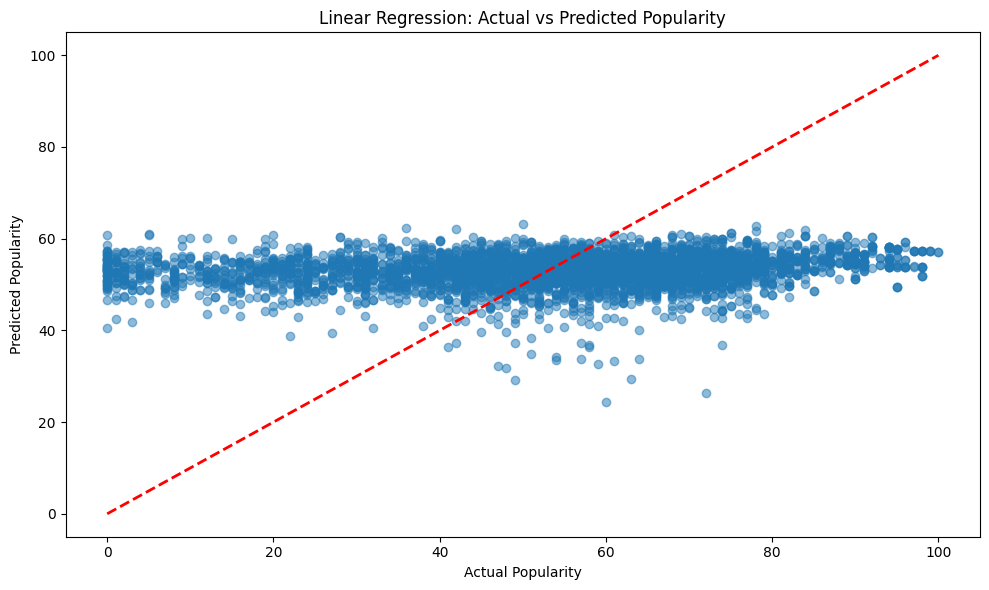

In [53]:
#Scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, linear_reg.predict(X_test), alpha=0.5)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=2)
plt.title('Linear Regression: Actual vs Predicted Popularity')
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.tight_layout()
plt.savefig('linear_regression_scatter.png')


In [54]:
#Let's make a prediction
single_prediction = best_model.predict(X_test[:1])
print(f"Single Prediction - Actual: {Y_test.iloc[0]}, Predicted: {single_prediction[0]:.2f}")

Single Prediction - Actual: 29, Predicted: 45.84
